In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir(r'C:\Users\Sandipto\OneDrive\Udemy ML\Part 2 - Regression\Section 5 - Multiple Linear Regression\Multiple_Linear_Regression\Multiple_Linear_Regression')

In [2]:
df = pd.read_csv('50_Startups.csv')
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

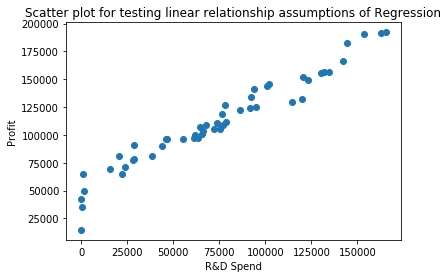

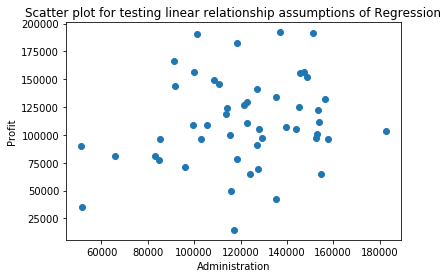

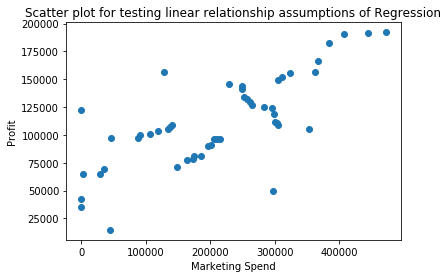

In [3]:
'''
Here we are testing the first assumption
i)There must be a linear relationship between the outcome variable and the independent variables.
Scatterplots can show whether there is a linear or curvilinear relationship.
'''
col = 0
idv = df.columns[col]
X = df[idv]
y = df['Profit']

plt.scatter(X, y)
plt.title('Scatter plot for testing linear relationship assumptions of Regression')
plt.xlabel(idv)
plt.ylabel('Profit')
plt.show()

col = 1
idv = df.columns[col]
X = df[idv]
y = df['Profit']

plt.scatter(X, y)
plt.title('Scatter plot for testing linear relationship assumptions of Regression')
plt.xlabel(idv)
plt.ylabel('Profit')
plt.show()

col = 2
idv = df.columns[col]
X = df[idv]
y = df['Profit']

plt.scatter(X, y)
plt.title('Scatter plot for testing linear relationship assumptions of Regression')
plt.xlabel(idv)
plt.ylabel('Profit')
plt.show()

                 R&D Spend  Administration  Marketing Spend
R&D Spend         1.000000        0.241955         0.724248
Administration    0.241955        1.000000        -0.032154
Marketing Spend   0.724248       -0.032154         1.000000


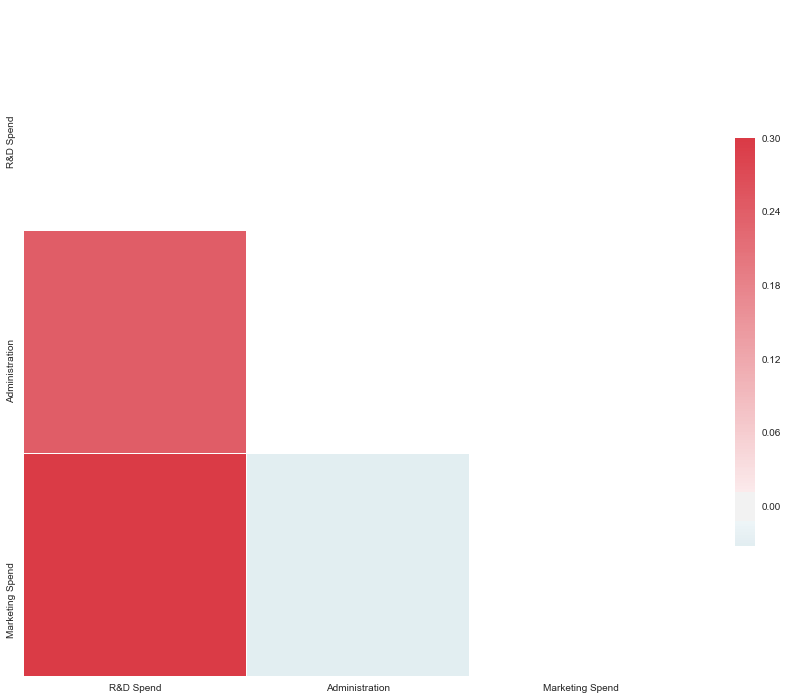

In [4]:
'''
Testing the 3rd assumption
iii)No Multicollinearity—multiple regression assumes that the independent variables are not highly correlated with each other.
This assumption is tested using ,correlation matrix, Variance Inflation Factor (VIF) values.
'''
import seaborn as sn
import numpy as np
## Correlation Matrix
sn.set(style="white",font_scale = 1)

# Compute the correlation matrix
corr = df.drop(columns = ['Profit']).corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            )

print(corr)

In [5]:
'''
Testing 2nd assumption:
ii)Multivariate Normality–Multiple regression assumes that the residuals are normally distributed.
'''
df2 = pd.get_dummies(df)
df2 = df2.drop(columns = ['State_New York'])

In [6]:
X_train = df2.drop(columns = ['Profit'])
y_train = df2['Profit']
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_train)
df2['Profit_pred'] = y_pred
df2['Residuals'] = df2['Profit'] - df2['Profit_pred']

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 3., 2., 6., 1., 1., 4., 3., 5.,
        2., 2., 1., 0., 2., 1., 2., 2., 3., 1., 1., 1., 0., 1., 0., 1.]),
 array([-33503.6387926 , -32486.81171094, -31469.98462929, -30453.15754764,
        -29436.33046598, -28419.50338433, -27402.67630268, -26385.84922102,
        -25369.02213937, -24352.19505772, -23335.36797606, -22318.54089441,
        -21301.71381276, -20284.88673111, -19268.05964945, -18251.2325678 ,
        -17234.40548615, -16217.57840449, -15200.75132284, -14183.92424119,
        -13167.09715953, -12150.27007788, -11133.44299623, -10116.61591457,
         -9099.78883292,  -8082.96175127,  -7066.13466961,  -6049.30758796,
         -5032.48050631,  -4015.65342466,  -2998.826343  ,  -1981.99926135,
          -965.1721797 ,     51.65490196,   1068.48198361,   2085.30906526,
          3102.13614692,   4118.96322857,   5135.79031022,   6152.61739188,
          7169

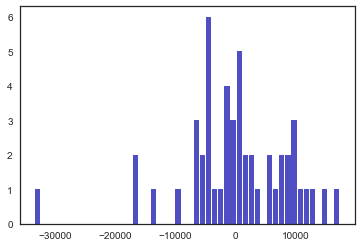

In [7]:
'''
Testing 2nd assumption
ii)Multivariate Normality–Multiple regression assumes that the residuals are normally distributed
'''
vals = np.size(df2.loc[:,'Residuals'].unique())
plt.hist(df2['Residuals'], bins=vals, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

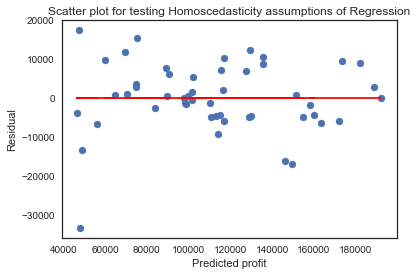

In [13]:
'''
Testing 4th assumption
iv)	Homoscedasticity–This assumption states that the variance of error terms are similar
across the values of the independent variables.
Testing: A scatterplot of residuals versus predicted values is good way to check for homoscedasticity.
Note that this plot will have a mean of 0.
There should be no clear pattern in the distribution; if there is a cone-shaped pattern (as shown below), the data is heteroscedastic.
If the data are heteroscedastic, a non-linear data transformation or addition of a quadratic term might fix the problem.
'''
X = df2['Profit_pred']
y = df2['Residuals']
y_mean = np.zeros_like(X)
y_mean = np.full((X.shape), y.mean())
plt.scatter(X, y)
plt.plot(X, y_mean, color = 'red')
plt.title('Scatter plot for testing Homoscedasticity assumptions of Regression')
plt.xlabel('Predicted profit')
plt.ylabel('Residual')
plt.show()
